Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Stochastic Gradient Descent (SGD):

Learning rate: 0.1

Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Training loss nan, Validation loss nan
Epoch 5000, Training loss nan, Validation loss nan
Learning rate: 0.01

Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, 

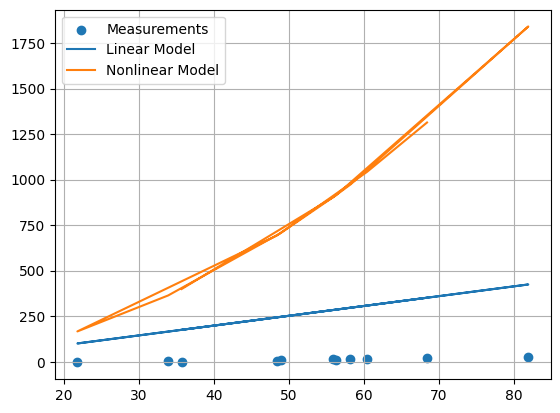

In [11]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import drive


#Problem 1
# Mount Google Drive
drive.mount('/content/drive')

# Temperature data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Convert lists to tensors
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Split data into training and validation sets
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

# Extract training and validation data
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# Normalize the training and validation inputs
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Define non-linear model
def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Define linear model
def linear_model(t_u, w, b):
    return w * t_u + b

# Define loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

# Training loop for non-linear model
def nonlinear_train(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = nonlinear_model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = nonlinear_model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return params

# Training loop for linear model
def linear_train(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = linear_model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = linear_model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return params

# Experiment with different learning rates and optimizers
learning_rates = [0.1, 0.01, 0.001, 0.0001]

print('Stochastic Gradient Descent (SGD):\n')
for lr in learning_rates:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    print(f'Learning rate: {lr}\n')
    nonlinear_train(n_epochs=5000, optimizer=optimizer, params=params, train_t_u=train_t_un, train_t_c=train_t_c, val_t_u=val_t_un, val_t_c=val_t_c)

print('Adam Optimizer:\n')
for lr in learning_rates:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    print(f'Learning rate: {lr}\n')
    nonlinear_train(n_epochs=5000, optimizer=optimizer, params=params, train_t_u=train_t_un, train_t_c=train_t_c, val_t_u=val_t_un, val_t_c=val_t_c)

# Compare the best non-linear model with a linear model
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
nonlinear_optimizer = optim.Adam([nonlinear_params], lr=0.1)
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
linear_optimizer = optim.Adam([linear_params], lr=0.01)

nonlinear_params = nonlinear_train(n_epochs=5000, optimizer=nonlinear_optimizer, params=nonlinear_params, train_t_u=train_t_un, train_t_c=train_t_c, val_t_u=val_t_un, val_t_c=val_t_c)
linear_params = linear_train(n_epochs=5000, optimizer=linear_optimizer, params=linear_params, train_t_u=train_t_un, train_t_c=train_t_c, val_t_u=val_t_un, val_t_c=val_t_c)

t_p_linear = linear_model(t_u, *linear_params).detach().numpy()
t_p_nonlinear = nonlinear_model(t_u, *nonlinear_params).detach().numpy()

# Plot results
plt.scatter(t_u, t_c, label='Measurements')
plt.plot(t_u, t_p_linear, label='Linear Model')
plt.plot(t_u, t_p_nonlinear, label='Nonlinear Model')
plt.legend()
plt.grid()
plt.show()

In [12]:
import pandas as pd
import torch
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Loading the dataset
file_path = 'https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv'
housing = pd.read_csv(file_path)

# Displaying the first 10 rows of the dataset
print(housing.head(10))

# Function for 6-parameter linear model
def linear_model1(x, params):
    return torch.matmul(x, params[:-1]) + params[-1]

# Function for 11-parameter linear model
def linear_model2(x, params):
    return torch.matmul(x, params[:-1]) + params[-1]

# Training function for 6-parameter model
def linear_train1(epochs, optimizer, params, train_x, val_x, train_y, val_y, loss_fn):
    train_losses = []
    val_losses = []
    for epoch in range(1, epochs + 1):
        train_p = linear_model1(train_x, params)
        train_loss = loss_fn(train_p, train_y)
        val_p = linear_model1(val_x, params)
        val_loss = loss_fn(val_p, val_y)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        if epoch % 500 == 0:
            print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}')
    return params, train_losses, val_losses

# Training function for 11-parameter model
def linear_train2(epochs, optimizer, params, train_x, val_x, train_y, val_y, loss_fn):
    train_losses = []
    val_losses = []
    for epoch in range(1, epochs + 1):
        train_p = linear_model2(train_x, params)
        train_loss = loss_fn(train_p, train_y)
        val_p = linear_model2(val_x, params)
        val_loss = loss_fn(val_p, val_y)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        if epoch % 500 == 0:
            print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}')
    return params, train_losses, val_losses

# Selecting features and target variable for the 6-parameter model
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
x = housing[features].values
y = housing['price'].values

# Standardizing the features
sc = StandardScaler()
x_sc = sc.fit_transform(x)

# Converting to tensors
x = torch.tensor(x_sc, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Splitting into training and validation sets
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_x = x[train_indices]
train_y = y[train_indices]
val_x = x[val_indices]
val_y = y[val_indices]

# Defining the loss function
loss_fn = torch.nn.MSELoss()

# Training the 6-parameter model with different learning rates using Adam optimizer
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    params = torch.tensor([1.0] * 5 + [0.0], dtype=torch.float32, requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    print(f'Learning rate: {lr}\n')
    trained_params, train_losses, val_losses = linear_train1(5000, optimizer, params, train_x, val_x, train_y, val_y, loss_fn)

# Training the 6-parameter model with different learning rates using SGD optimizer
for lr in learning_rates:
    params = torch.tensor([1.0] * 5 + [0.0], dtype=torch.float32, requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    print(f'Learning rate: {lr}\n')
    trained_params, train_losses, val_losses = linear_train1(5000, optimizer, params, train_x, val_x, train_y, val_y, loss_fn)

# Encoding binary categorical variables
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
binary_map = lambda x: x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)
print(housing.head())

# Selecting features and target variable for the 11-parameter model
feature_list = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking']
x1 = housing[feature_list].values
y1 = housing['price'].values.reshape(-1, 1)

# Standardizing the features
x1_sc = sc.fit_transform(x1)

# Converting to tensors
x1 = torch.tensor(x1_sc, dtype=torch.float32)
y1 = torch.tensor(y1, dtype=torch.float32)

# Splitting into training and validation sets
n_samples = x1.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_x1 = x1[train_indices]
train_y1 = y1[train_indices]
val_x1 = x1[val_indices]
val_y1 = y1[val_indices]

# Training the 11-parameter model with different learning rates using Adam optimizer
for lr in learning_rates:
    params = torch.tensor([1.0] * 10 + [0.0], dtype=torch.float32, requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    print(f'Learning rate: {lr}\n')
    trained_params, train_losses, val_losses = linear_train2(5000, optimizer, params, train_x1, val_x1, train_y1, val_y1, loss_fn)

# Training the 11-parameter model with different learning rates using SGD optimizer
for lr in learning_rates:
    params = torch.tensor([1.0] * 10 + [0.0], dtype=torch.float32, requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    print(f'Learning rate: {lr}\n')
    trained_params, train_losses, val_losses = linear_train2(5000, optimizer, params, train_x1, val_x1, train_y1, val_y1, loss_fn)

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([436, 1])) that is different to the input size (torch.Size([436])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([109, 1])) that is different to the input size (torch.Size([109])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epochs: 500, 	Training Loss: 26201999540224.000000, 	Validation Loss: 26258792513536.000000
Epochs: 1000, 	Training Loss: 26201424920576.000000, 	Validation Loss: 26258717016064.000000
Epochs: 1500, 	Training Loss: 26200848203776.000000, 	Validation Loss: 26258645712896.000000
Epochs: 2000, 	Training Loss: 26200275681280.000000, 	Validation Loss: 26258570215424.000000
Epochs: 2500, 	Training Loss: 26199701061632.000000, 	Validation Loss: 26258494717952.000000
Epochs: 3000, 	Training Loss: 26199126441984.000000, 	Validation Loss: 26258419220480.000000
Epochs: 3500, 	Training Loss: 26198553919488.000000, 	Validation Loss: 26258345820160.000000
Epochs: 4000, 	Training Loss: 26197977202688.000000, 	Validation Loss: 26258266128384.000000
Epochs: 4500, 	Training Loss: 26197404680192.000000, 	Validation Loss: 26258194825216.000000
Epochs: 5000, 	Training Loss: 26196830060544.000000, 	Validation Loss: 26258121424896.000000
Learning rate: 0.01

Epochs: 500, 	Training Loss: 26202517536768.000000

In [13]:
import pandas as pd
import torch
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


#Problem 3
# Load dataset
url = 'https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv'
housing_data = pd.read_csv(url)
print(housing_data.head(10))

# Linear models
def linear_model_6(x, params):
    return torch.matmul(x, params[:-1]) + params[-1]

def linear_model_11(x, params):
    return torch.matmul(x, params[:-1]) + params[-1]

# Training functions
def train_linear_model_6(epochs, optimizer, params, train_x, val_x, train_y, val_y, loss_function):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        train_pred = linear_model_6(train_x, params)
        train_loss = loss_function(train_pred, train_y)
        val_pred = linear_model_6(val_x, params)
        val_loss = loss_function(val_pred, val_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 500 == 0:
            print(f'Epoch: {epoch + 1}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    return params, train_losses, val_losses

def train_linear_model_11(epochs, optimizer, params, train_x, val_x, train_y, val_y, loss_function):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        train_pred = linear_model_11(train_x, params)
        train_loss = loss_function(train_pred, train_y)
        val_pred = linear_model_11(val_x, params)
        val_loss = loss_function(val_pred, val_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 500 == 0:
            print(f'Epoch: {epoch + 1}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    return params, train_losses, val_losses

# Data preparation for 6-parameter model
features_6 = ["area", "bedrooms", "bathrooms", "stories", "parking"]
x_6 = housing_data[features_6].values
y_6 = housing_data['price'].values

scaler = StandardScaler()
x_6_scaled = scaler.fit_transform(x_6)

x_6_tensor = torch.tensor(x_6_scaled, dtype=torch.float32)
y_6_tensor = torch.tensor(y_6, dtype=torch.float32)

num_samples = x_6_tensor.shape[0]
num_val = int(0.2 * num_samples)
indices = torch.randperm(num_samples)
train_indices_6 = indices[:-num_val]
val_indices_6 = indices[-num_val:]

train_x_6 = x_6_tensor[train_indices_6]
train_y_6 = y_6_tensor[train_indices_6]
val_x_6 = x_6_tensor[val_indices_6]
val_y_6 = y_6_tensor[val_indices_6]

# Training the 6-parameter model with Adam optimizer
loss_function = torch.nn.MSELoss()
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    params_6 = torch.tensor([1.0] * 5 + [0.0], requires_grad=True)
    optimizer_6 = optim.Adam([params_6], lr=lr)
    print(f'Adam Optimizer - Learning Rate: {lr}')
    trained_params_6, train_losses_6, val_losses_6 = train_linear_model_6(
        5000, optimizer_6, params_6, train_x_6, val_x_6, train_y_6, val_y_6, loss_function)

# Training the 6-parameter model with SGD optimizer
for lr in learning_rates:
    params_6 = torch.tensor([1.0] * 5 + [0.0], requires_grad=True)
    optimizer_6 = optim.SGD([params_6], lr=lr)
    print(f'SGD Optimizer - Learning Rate: {lr}')
    trained_params_6, train_losses_6, val_losses_6 = train_linear_model_6(
        5000, optimizer_6, params_6, train_x_6, val_x_6, train_y_6, val_y_6, loss_function)

# Encode binary variables and prepare data for 11-parameter model
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
housing_data[binary_columns] = housing_data[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
print(housing_data.head())

features_11 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking']
x_11 = housing_data[features_11].values
y_11 = housing_data['price'].values.reshape(-1, 1)

x_11_scaled = scaler.fit_transform(x_11)

x_11_tensor = torch.tensor(x_11_scaled, dtype=torch.float32)
y_11_tensor = torch.tensor(y_11, dtype=torch.float32)

train_indices_11 = indices[:-num_val]
val_indices_11 = indices[-num_val:]

train_x_11 = x_11_tensor[train_indices_11]
train_y_11 = y_11_tensor[train_indices_11]
val_x_11 = x_11_tensor[val_indices_11]
val_y_11 = y_11_tensor[val_indices_11]

# Training the 11-parameter model with Adam optimizer
for lr in learning_rates:
    params_11 = torch.tensor([1.0] * 10 + [0.0], requires_grad=True)
    optimizer_11 = optim.Adam([params_11], lr=lr)
    print(f'Adam Optimizer - Learning Rate: {lr}')
    trained_params_11, train_losses_11, val_losses_11 = train_linear_model_11(
        5000, optimizer_11, params_11, train_x_11, val_x_11, train_y_11, val_y_11, loss_function)

# Training the 11-parameter model with SGD optimizer
for lr in learning_rates:
    params_11 = torch.tensor([1.0] * 10 + [0.0], requires_grad=True)
    optimizer_11 = optim.SGD([params_11], lr=lr)
    print(f'SGD Optimizer - Learning Rate: {lr}')
    trained_params_11, train_losses_11, val_losses_11 = train_linear_model_11(
        5000, optimizer_11, params_11, train_x_11, val_x_11, train_y_11, val_y_11, loss_function)

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([436, 1])) that is different to the input size (torch.Size([436])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([109, 1])) that is different to the input size (torch.Size([109])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 500, Train Loss: 26795512430592.000000, Val Loss: 23884719980544.000000
Epoch: 1000, Train Loss: 26794962976768.000000, Val Loss: 23884524945408.000000
Epoch: 1500, Train Loss: 26794413522944.000000, Val Loss: 23884332007424.000000
Epoch: 2000, Train Loss: 26793859874816.000000, Val Loss: 23884136972288.000000
Epoch: 2500, Train Loss: 26793308323840.000000, Val Loss: 23883941937152.000000
Epoch: 3000, Train Loss: 26792760967168.000000, Val Loss: 23883748999168.000000
Epoch: 3500, Train Loss: 26792209416192.000000, Val Loss: 23883551866880.000000
Epoch: 4000, Train Loss: 26791662059520.000000, Val Loss: 23883356831744.000000
Epoch: 4500, Train Loss: 26791106314240.000000, Val Loss: 23883163893760.000000
Epoch: 5000, Train Loss: 26790561054720.000000, Val Loss: 23882970955776.000000
Adam Optimizer - Learning Rate: 0.01
Epoch: 500, Train Loss: 26796007358464.000000, Val Loss: 23884896141312.000000
Epoch: 1000, Train Loss: 26795950735360.000000, Val Loss: 23884877266944.000000
Epoch